In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
accepted = pd.read_csv('/content/accepted_2007_to_2018Q4.csv')
accepted.head(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,...,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,...,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,NaN,NaN,6.0,0.0,7869.0,56.2,18.0,w,0.00,0.00,...,218418.0,18696.0,6200.0,14877.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,076xx,NJ,17.06,0.0,Sep-2008,785.0,789.0,0.0,NaN,NaN,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,...,381215.0,52226.0,62500.0,18000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.0,w,0.00,0.00,...,439570.0,95768.0,20300.0,88097.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for col in accepted.columns:
  print(col)

id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
fico_range_low
fico_range_high
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
last_fico_range_high
last_fico_range_low
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_act_il
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
to

In [ ]:
cols = [0,2,3,5,6,7,8,9,10,11,12,13,14,16]
new_accepted = accepted[accepted.columns[cols]]

In [ ]:
new_accepted.head(5)

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status
0,68407277,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Fully Paid
1,68355089,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Fully Paid
2,68341763,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Fully Paid
3,66310712,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Current
4,68476807,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Fully Paid


In [ ]:
new_accepted.isnull().sum()

id                       0
loan_amnt                0
funded_amnt              0
term                     0
int_rate                 0
installment              0
grade                    0
sub_grade                0
emp_title              846
emp_length             838
home_ownership           0
annual_inc               0
verification_status      0
loan_status              0
dtype: int64

In [ ]:
new_accepted = new_accepted.dropna()
new_accepted.isnull().sum()

id                     0
loan_amnt              0
funded_amnt            0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_title              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
loan_status            0
dtype: int64

In [ ]:
new_accepted.home_ownership.unique()

array(['MORTGAGE', 'RENT', 'OWN'], dtype=object)

In [ ]:
new_accepted['loan_status'].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)'], dtype=object)

In [ ]:
new_accepted = new_accepted.loc[new_accepted['loan_status'].isin(['Fully Paid', 'Charged Off'])]
new_accepted['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

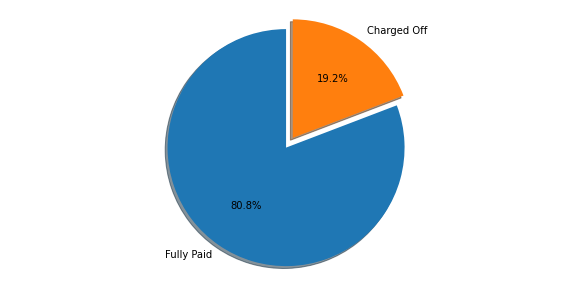

In [ ]:
status_counts = new_accepted['loan_status'].value_counts()
explode = (0, 0.1)
labels = 'Fully Paid', 'Charged Off'

plt.figure(figsize=(10,5))
plt.pie(status_counts, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.axis('equal')
plt.show()

Text(0.5, 1.0, 'Interest rate in installments')

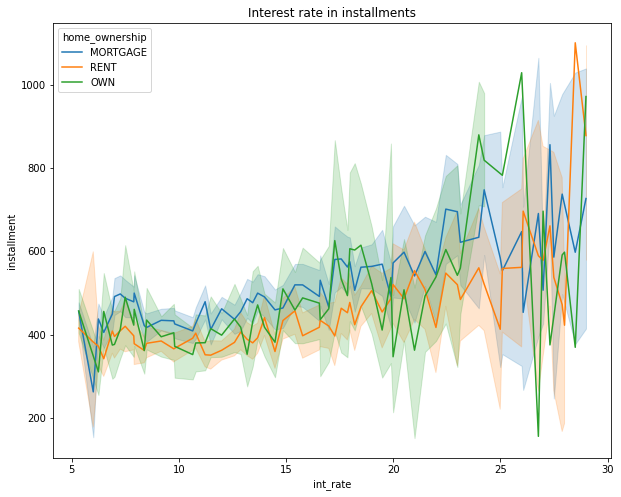

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(x='int_rate',y='installment',hue='home_ownership',data=new_accepted)
plt.title('Interest rate in installments')

In [ ]:
new_accepted.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status
0,68407277,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Fully Paid
1,68355089,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Fully Paid
2,68341763,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Fully Paid
4,68476807,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Fully Paid
5,68426831,11950.0,11950.0,36 months,13.44,405.18,C,C3,Veterinary Tecnician,4 years,RENT,34000.0,Source Verified,Fully Paid


In [ ]:
new_accepted['term'] = new_accepted['term'].str.replace('months',' ')
new_accepted['emp_length'] = new_accepted['emp_length'].str.replace('years',' ')
new_accepted.drop(['grade','sub_grade'],axis=1,inplace=True)

new_accepted.head(2)

,id,loan_amnt,funded_amnt,term,int_rate,installment,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status
0,68407277,3600.0,3600.0,36,13.99,123.03,leadman,10+,MORTGAGE,55000.0,Not Verified,Fully Paid
1,68355089,24700.0,24700.0,36,11.99,820.28,Engineer,10+,MORTGAGE,65000.0,Not Verified,Fully Paid


In [ ]:
new_accepted['emp_length'] = new_accepted['emp_length'].str.replace(r'\D', '')

In [ ]:
X = new_accepted.drop(['loan_status'],axis=1)

y = new_accepted['loan_status']

In [ ]:
X.tail(5)

,id,loan_amnt,funded_amnt,term,int_rate,installment,emp_title,emp_length,home_ownership,annual_inc,verification_status
14010,67379109,4900.0,4900.0,36,11.22,160.94,Carrier,10,MORTGAGE,78000.0,Verified
14012,67398201,30000.0,30000.0,36,8.38,945.36,First vice president,2,RENT,160000.0,Verified
14013,67458749,35000.0,35000.0,60,12.59,789.04,Sales Manager,3,RENT,125000.0,Source Verified
14014,67298545,6000.0,6000.0,36,9.76,192.93,Teacher,6,RENT,57000.0,Verified
14015,67298614,7800.0,7800.0,36,9.17,248.66,RN,7,RENT,52000.0,Source Verified


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in X.columns:
  X[str(col)] = le.fit_transform(X[str(col)])

X.tail(5)

,id,loan_amnt,funded_amnt,term,int_rate,installment,emp_title,emp_length,home_ownership,annual_inc,verification_status
14010,1545,110,110,0,17,569,861,1,0,820,2
14012,1626,846,846,0,10,4212,2177,2,2,1234,2
14013,1952,916,916,1,20,3946,4461,3,2,1144,1
14014,1093,147,147,0,13,732,5347,6,2,548,2
14015,1096,213,213,0,12,1067,4128,7,2,467,1


In [ ]:
y

0         Fully Paid
1         Fully Paid
2         Fully Paid
4         Fully Paid
5         Fully Paid
            ...     
14010     Fully Paid
14012     Fully Paid
14013     Fully Paid
14014    Charged Off
14015     Fully Paid
Name: loan_status, Length: 11665, dtype: object

In [ ]:
y.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [ ]:
y = y.map({'Fully Paid':0,'Charged Off':1})
y

0        0
1        0
2        0
4        0
5        0
        ..
14010    0
14012    0
14013    0
14014    1
14015    0
Name: loan_status, Length: 11665, dtype: int64

In [ ]:
y.unique()

array([0, 1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
len(X_train)

8165

In [ ]:
len(X_test)

3500

## Using MinMaxScaler for Scaling the data




In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scaler = MinMaxScaler()
model = LogisticRegression(max_iter=10000, class_weight='balanced')

pipeline = Pipeline(steps=[('s', scaler), ('m', model)])

scores = cross_val_score(pipeline, X_train, y_train)

In [ ]:
from numpy import mean
from numpy import std
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.693 (0.007)


We got an accuracy of 70% which is good accuracy using MinMaxScaler with logisticregression

## Also used StandardScaler for better understanding between MinMaxScaler and StandardScaler.



In [ ]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

model = LogisticRegression(max_iter=10000, class_weight='balanced')

pipeline = Pipeline(steps=[('s', standard_scaler), ('m', model)])

scores = cross_val_score(pipeline, X_train, y_train)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.693 (0.008)


Here, also we got 70% accuracy similar to MinMaxScaler sometimes we can expect little high accuracy with StandardScaler

# So, here we will be using MinMaxScaler for our model to scale the data.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

X_train_scaler = min_max_scaler.fit_transform(X_train)
X_test_scaler = min_max_scaler.transform(X_test)

[[2040  778]
 [ 248  434]]


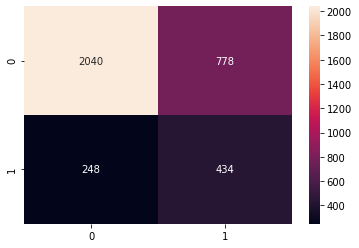

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

logistic_model = LogisticRegression(max_iter=10000, class_weight='balanced')
logistic_model.fit(X_train_scaler, y_train)

y_pred = logistic_model.predict(X_test_scaler)

cm = confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True,fmt='d')

In [ ]:
# on testing set
logistic_model.score(X_test_scaler, y_test)

0.7068571428571429

In [ ]:
# on training set
logistic_model.score(X_train_scaler, y_train)

0.6933251684017147

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.72      0.80      2818
           1       0.36      0.64      0.46       682

    accuracy                           0.71      3500
   macro avg       0.62      0.68      0.63      3500
weighted avg       0.79      0.71      0.73      3500



In [ ]:
import pickle
pickle_out = open('logistic_model.pkl', 'wb')
pickle.dump(logistic_model, pickle_out)
pickle_out.close()

## Using Random Forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

In [ ]:
rfc.fit(X_train_scaler, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rfc.score(X_test_scaler, y_test)

0.7985714285714286

In [ ]:
rfc.score(X_train_scaler, y_train)

1.0

[[2726   92]
 [ 613   69]]


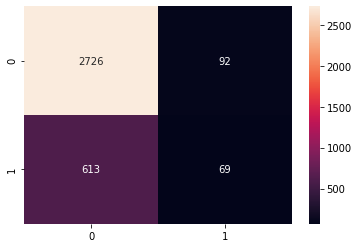

In [ ]:
y_pre = rfc.predict(X_test_scaler)
cm = confusion_matrix(y_test, y_pre)

print(cm)

sns.heatmap(cm,annot=True,fmt='d')

In [ ]:
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      2818
           1       0.43      0.10      0.16       682

    accuracy                           0.80      3500
   macro avg       0.62      0.53      0.52      3500
weighted avg       0.74      0.80      0.74      3500



In [ ]:
import pickle
pickle_out = open('rfc.pkl', 'wb')
pickle.dump(rfc, pickle_out)
pickle_out.close()

## Using Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [ ]:
tree.fit(X_train_scaler, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# on testing set
tree.score(X_test_scaler,y_test)

0.7102857142857143

In [ ]:
# on training set
tree.score(X_train_scaler, y_train)

1.0

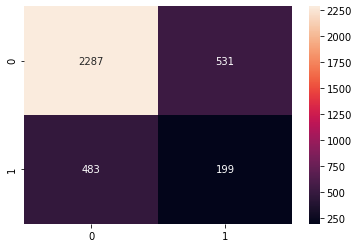

In [ ]:
y_predicted = tree.predict(X_test_scaler)
cm = confusion_matrix(y_test, y_predicted)

sns.heatmap(cm,annot=True, fmt='d')

In [ ]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      2818
           1       0.27      0.29      0.28       682

    accuracy                           0.71      3500
   macro avg       0.55      0.55      0.55      3500
weighted avg       0.72      0.71      0.71      3500



In [ ]:
import pickle
pickle_out = open('tree.pkl', 'wb')
pickle.dump(tree, pickle_out)
pickle_out.close()

In [ ]:
X_train_scaler.shape

(8165, 11)

Using Neural networks

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
                          keras.layers.Dense(89, input_shape=(11,),activation='relu'),
                          keras.layers.Dropout(0.2),
                          keras.layers.Dense(89,activation='relu'),
                          keras.layers.Dropout(0.2),
                          keras.layers.Dense(45, activation='relu'),
                          keras.layers.Dropout(0.2),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 89)                1068      
_________________________________________________________________
dropout (Dropout)            (None, 89)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 89)                8010      
_________________________________________________________________
dropout_1 (Dropout)          (None, 89)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 45)                4050      
_________________________________________________________________
dropout_2 (Dropout)          (None, 45)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                9

In [ ]:
history = model.fit(X_train_scaler, y_train, epochs=100, verbose=1)

Epoch 1/100
256/256 [==============================] - 4s 3ms/step - loss: 0.4785 - accuracy: 0.8088
Epoch 2/100
256/256 [==============================] - 1s 3ms/step - loss: 0.4519 - accuracy: 0.8098
Epoch 3/100
256/256 [==============================] - 1s 3ms/step - loss: 0.4464 - accuracy: 0.8104
Epoch 4/100
256/256 [==============================] - 1s 3ms/step - loss: 0.4440 - accuracy: 0.8100
Epoch 5/100
256/256 [==============================] - 1s 3ms/step - loss: 0.4445 - accuracy: 0.8098
Epoch 6/100
256/256 [==============================] - 1s 3ms/step - loss: 0.4404 - accuracy: 0.8116
Epoch 7/100
256/256 [==============================] - 1s 3ms/step - loss: 0.4404 - accuracy: 0.8152
Epoch 8/100
256/256 [==============================] - 1s 3ms/step - loss: 0.4385 - accuracy: 0.8107
Epoch 9/100
256/256 [==============================] - 1s 3ms/step - loss: 0.4384 - accuracy: 0.8107
Epoch 10/100
256/256 [==============================] - 1s 3ms/step - loss: 0.4395 - accura

In [ ]:
model.evaluate(X_test_scaler, y_test)

110/110 [==============================] - 0s 2ms/step - loss: 0.4820 - accuracy: 0.8023


[0.48195308446884155, 0.8022857308387756]

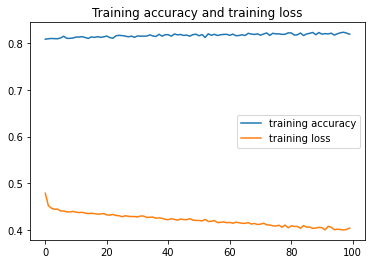

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))
plt.plot(epochs, acc, label='training accuracy')
plt.plot(epochs, loss, label='training loss')
plt.title('Training accuracy and training loss')
plt.legend()
plt.show()

In [ ]:
model.save('my_model.h5')

In [ ]:
model.save('My Drive/saved_model/my_model')

INFO:tensorflow:Assets written to: My Drive/saved_model/my_model/assets
